#Exercise 5

5.1

In [1]:
import numpy as np
import scipy.stats as stats

# Define the integrand function
def integrand(x):
    return np.exp(x)

# Generate random samples
n_samples = 100
x_samples = np.random.uniform(0, 1, n_samples)

# Compute the function values
f_samples = integrand(x_samples)

# Estimate the integral value (point estimate)
I_hat = np.mean(f_samples)

# Compute the sample standard deviation
sigma_hat = np.std(f_samples, ddof=1)

# Compute the confidence interval
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
confidence_interval = (
    I_hat - z * sigma_hat / np.sqrt(n_samples),
    I_hat + z * sigma_hat / np.sqrt(n_samples)
)

# Print the results
I_hat, confidence_interval

# Print the results
print("Point estimate of the integral:", I_hat)
print("95% confidence interval:", confidence_interval)


Point estimate of the integral: 1.7561761481784595
95% confidence interval: (1.6578365401688724, 1.8545157561880465)


5.2

In [3]:

# Define the integrand function
def integrand(x):
    return np.exp(x)

# Number of samples
n_samples = 100

# Generate random samples and their antithetic counterparts
x_samples = np.random.uniform(0, 1, n_samples // 2)
x_antithetic = 1 - x_samples

# Compute the function values for original and antithetic samples
f_samples = integrand(x_samples)
f_antithetic_samples = integrand(x_antithetic)

# Combine the function values
f_combined = np.concatenate((f_samples, f_antithetic_samples))

# Estimate the integral value (point estimate)
I_hat = np.mean(f_combined)

# Compute the sample standard deviation
sigma_hat = np.std(f_combined, ddof=1)

# Compute the confidence interval
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
confidence_interval = (
    I_hat - z * sigma_hat / np.sqrt(n_samples),
    I_hat + z * sigma_hat / np.sqrt(n_samples)
)

# Print the results
print("Point estimate of the integral:", I_hat)
print("95% confidence interval:", confidence_interval)



Point estimate of the integral: 1.717671825036305
95% confidence interval: (1.6210609133635376, 1.8142827367090724)


5.3

In [4]:


# Define the integrand function
def integrand(x):
    return np.exp(x)

# Define the control variate function
def control_variate(x):
    return x

# Number of samples
n_samples = 100

# Generate random samples
x_samples = np.random.uniform(0, 1, n_samples)

# Compute the function values for the integrand and control variate
f_samples = integrand(x_samples)
g_samples = control_variate(x_samples)

# Known integral of the control variate function over [0, 1]
mu_g = 0.5

# Compute the sample means
f_mean = np.mean(f_samples)
g_mean = np.mean(g_samples)

# Estimate the integral value (point estimate) using control variate
I_hat = f_mean + (mu_g - g_mean)

# Compute the sample standard deviation
sigma_hat = np.std(f_samples + (mu_g - g_samples), ddof=1)

# Compute the confidence interval
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
confidence_interval = (
    I_hat - z * sigma_hat / np.sqrt(n_samples),
    I_hat + z * sigma_hat / np.sqrt(n_samples)
)

# Print the results
print("Point estimate of the integral using control variate:", I_hat)
print("95% confidence interval:", confidence_interval)


Point estimate of the integral using control variate: 1.7264484425494917
95% confidence interval: (1.682615696114408, 1.7702811889845753)


5.4

In [5]:


# Define the integrand function
def integrand(x):
    return np.exp(x)

# Number of samples and strata
n_samples = 100
n_strata = 10
samples_per_stratum = n_samples // n_strata

# Generate stratified samples
stratified_samples = []
for i in range(n_strata):
    stratum_start = i / n_strata
    stratum_end = (i + 1) / n_strata
    stratum_samples = np.random.uniform(stratum_start, stratum_end, samples_per_stratum)
    stratified_samples.append(stratum_samples)

# Flatten the list of arrays to a single array
x_samples = np.concatenate(stratified_samples)

# Compute the function values
f_samples = integrand(x_samples)

# Estimate the integral value (point estimate)
I_hat = np.mean(f_samples)

# Compute the sample standard deviation
sigma_hat = np.std(f_samples, ddof=1)

# Compute the confidence interval
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
confidence_interval = (
    I_hat - z * sigma_hat / np.sqrt(n_samples),
    I_hat + z * sigma_hat / np.sqrt(n_samples)
)

# Print the results
print("Point estimate of the integral using stratified sampling:", I_hat)
print("95% confidence interval:", confidence_interval)


Point estimate of the integral using stratified sampling: 1.7176578885341691
95% confidence interval: (1.6221993281265181, 1.8131164489418201)


5.5

Constant Service Time Model

In [6]:

# Define the queuing system simulation function with constant service time
def simulate_blocking_system_constant(seed, m, service_time, total_customers):
    np.random.seed(seed)
    
    # Calculate arrival rate
    arrival_rate = 1.0  # Mean interarrival time = 1
    service_rate = 1 / service_time  # Service rate

    # Simulate arrival times
    arrival_times = np.cumsum(np.random.exponential(1/arrival_rate, total_customers))
    service_times = np.full(total_customers, service_time)  # Constant service time

    # Initialize service units
    servers = np.zeros(m)
    blocked_customers = 0  # Number of blocked customers

    # Simulation process
    for i in range(total_customers):
        # Check if there is an available service unit
        available_server = np.argmin(servers)
        if servers[available_server] <= arrival_times[i]:
            # If there is an available service unit, assign it to the customer
            servers[available_server] = arrival_times[i] + service_times[i]
        else:
            # If there is no available service unit, the customer is blocked
            blocked_customers += 1

    # Calculate blocking rate
    blocking_fraction = blocked_customers / total_customers
    return blocking_fraction

# Number of samples
n_samples = 100
m = 10
service_time = 8.0
total_customers = 100000
seed = 123

# Generate random samples
blocking_fractions = []
control_variates = []

for _ in range(n_samples):
    blocking_fraction = simulate_blocking_system_constant(seed, m, service_time, total_customers)
    blocking_fractions.append(blocking_fraction)
    control_variate = np.mean(np.random.uniform(0, 1, total_customers))  # Use the mean as control variate
    control_variates.append(control_variate)

# Known expected value of the control variate
mu_g = 0.5  # Expected value of uniform distribution between 0 and 1

# Compute sample means
blocking_fractions = np.array(blocking_fractions)
control_variates = np.array(control_variates)

f_mean = np.mean(blocking_fractions)
g_mean = np.mean(control_variates)

# Estimate the integral value (point estimate) using control variate
I_hat = f_mean + (mu_g - g_mean)

# Compute the standard deviation of the adjusted samples
adjusted_samples = blocking_fractions + (mu_g - control_variates)
sigma_hat = np.std(adjusted_samples, ddof=1)

# Compute the confidence interval
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
confidence_interval = (
    I_hat - z * sigma_hat / np.sqrt(n_samples),
    I_hat + z * sigma_hat / np.sqrt(n_samples)
)

# Print the results
print("Point estimate of the blocking fraction using control variates (Constant Service Time):", I_hat)
print("95% confidence interval:", confidence_interval)


Point estimate of the blocking fraction using control variates (Constant Service Time): 0.12105572572463173
95% confidence interval: (0.12105572572463172, 0.12105572572463175)


Pareto Distributed Service Time Model

In [7]:
import numpy as np
import scipy.stats as stats

# Define the queuing system simulation function with Pareto distributed service time
def simulate_blocking_system_pareto(seed, m, mean_service_time, total_customers, k):
    np.random.seed(seed)

    # Calculate rates
    arrival_rate = 1 / 1.0  # Mean interarrival time = 1
    service_scale = mean_service_time * (k - 1) / k  # To get the mean service time

    # Simulate arrival times and service times
    arrival_times = np.cumsum(np.random.exponential(arrival_rate, total_customers))
    service_times = np.random.pareto(k, total_customers) * service_scale

    # Initialize service units
    servers = np.zeros(m)
    blocked_customers = 0  # Number of blocked customers

    # Simulation process
    for i in range(total_customers):
        # Check if there is an available service unit
        available_server = np.argmin(servers)
        if servers[available_server] <= arrival_times[i]:
            # If there is an available service unit, assign it to the customer
            servers[available_server] = arrival_times[i] + service_times[i]
        else:
            # If there is no available service unit, the customer is blocked
            blocked_customers += 1

    # Calculate blocking rate
    blocking_fraction = blocked_customers / total_customers
    return blocking_fraction

# Number of samples
n_samples = 100
m = 10
mean_service_time = 8.0
total_customers = 100000
k = 2.05
seed = 123

# Generate random samples
blocking_fractions = []
control_variates = []

for _ in range(n_samples):
    blocking_fraction = simulate_blocking_system_pareto(seed, m, mean_service_time, total_customers, k)
    blocking_fractions.append(blocking_fraction)
    control_variate = np.mean(np.random.uniform(0, 1, total_customers))  # Use the mean as control variate
    control_variates.append(control_variate)

# Known expected value of the control variate
mu_g = 0.5  # Expected value of uniform distribution between 0 and 1

# Compute sample means
blocking_fractions = np.array(blocking_fractions)
control_variates = np.array(control_variates)

f_mean = np.mean(blocking_fractions)
g_mean = np.mean(control_variates)

# Estimate the integral value (point estimate) using control variate
I_hat = f_mean + (mu_g - g_mean)

# Compute the standard deviation of the adjusted samples
adjusted_samples = blocking_fractions + (mu_g - control_variates)
sigma_hat = np.std(adjusted_samples, ddof=1)

# Compute the confidence interval
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
confidence_interval = (
    I_hat - z * sigma_hat / np.sqrt(n_samples),
    I_hat + z * sigma_hat / np.sqrt(n_samples)
)

# Print the results
print("Point estimate of the blocking fraction using control variates (Pareto Distributed Service Time):", I_hat)
print("95% confidence interval:", confidence_interval)


Point estimate of the blocking fraction using control variates (Pareto Distributed Service Time): 0.003862847531135291
95% confidence interval: (0.0038628475311352907, 0.0038628475311352915)


Normally Distributed Service Time Model

In [8]:
import numpy as np
import scipy.stats as stats

# Define the queuing system simulation function with normally distributed service time
def simulate_blocking_system_normal(seed, m, mean_service_time, total_customers, std_dev):
    np.random.seed(seed)

    # Calculate rates
    arrival_rate = 1.0  # Mean interarrival time = 1

    # Simulate arrival times and service times
    arrival_times = np.cumsum(np.random.exponential(arrival_rate, total_customers))
    service_times = np.random.normal(mean_service_time, std_dev, total_customers)

    # Ensure no negative service times
    service_times = np.maximum(service_times, 0)

    # Initialize service units
    servers = np.zeros(m)
    blocked_customers = 0  # Number of blocked customers

    # Simulation process
    for i in range(total_customers):
        # Check if there is an available service unit
        available_server = np.argmin(servers)
        if servers[available_server] <= arrival_times[i]:
            # If there is an available service unit, assign it to the customer
            servers[available_server] = arrival_times[i] + service_times[i]
        else:
            # If there is no available service unit, the customer is blocked
            blocked_customers += 1

    # Calculate blocking rate
    blocking_fraction = blocked_customers / total_customers
    return blocking_fraction

# Number of samples
n_samples = 100
m = 10
mean_service_time = 8.0
total_customers = 100000
std_dev = 1.0
seed = 123

# Generate random samples
blocking_fractions = []
control_variates = []

for _ in range(n_samples):
    blocking_fraction = simulate_blocking_system_normal(seed, m, mean_service_time, total_customers, std_dev)
    blocking_fractions.append(blocking_fraction)
    control_variate = np.mean(np.random.uniform(0, 1, total_customers))  # Use the mean as control variate
    control_variates.append(control_variate)

# Known expected value of the control variate
mu_g = 0.5  # Expected value of uniform distribution between 0 and 1

# Compute sample means
blocking_fractions = np.array(blocking_fractions)
control_variates = np.array(control_variates)

f_mean = np.mean(blocking_fractions)
g_mean = np.mean(control_variates)

# Estimate the integral value (point estimate) using control variate
I_hat = f_mean + (mu_g - g_mean)

# Compute the standard deviation of the adjusted samples
adjusted_samples = blocking_fractions + (mu_g - control_variates)
sigma_hat = np.std(adjusted_samples, ddof=1)

# Compute the confidence interval
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
confidence_interval = (
    I_hat - z * sigma_hat / np.sqrt(n_samples),
    I_hat + z * sigma_hat / np.sqrt(n_samples)
)


# Print the results
print("Point estimate of the blocking fraction using control variates (Normally Distributed Service Time):", I_hat)
print("95% confidence interval:", confidence_interval)

Point estimate of the blocking fraction using control variates (Normally Distributed Service Time): 0.12144142534730164
95% confidence interval: (0.12144142534730162, 0.12144142534730165)


5.6

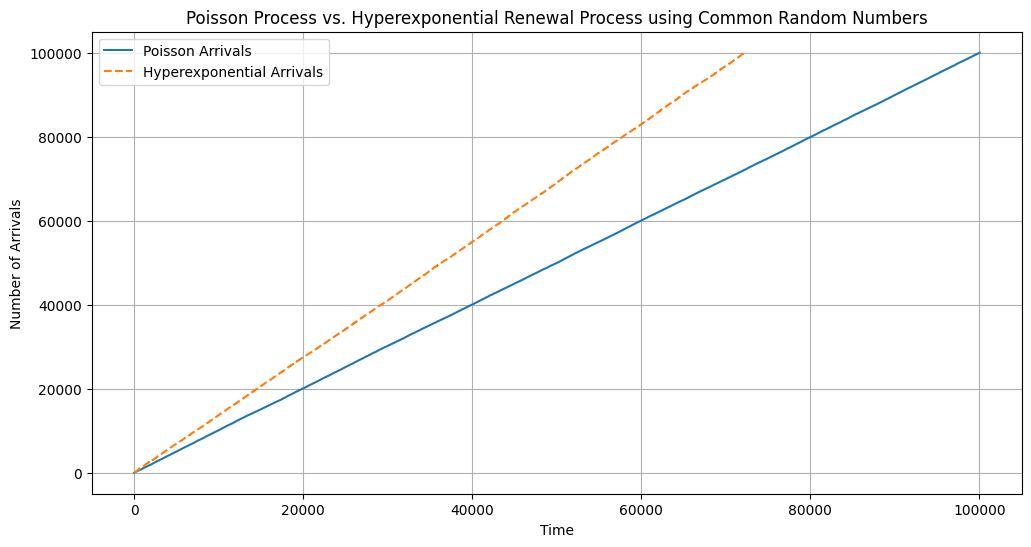

Blocking fraction (Poisson): 0.12249
95% confidence interval (Poisson): [0.12046, 0.12452]
Blocking fraction (Hyperexponential): 0.32312
95% confidence interval (Hyperexponential): [0.32022, 0.32602]
Mean arrival time (Poisson): 49968.78222444239
Mean arrival time (Hyperexponential): 36245.61217197072
Variance of arrival times (Poisson): 837058676.6912239
Variance of arrival times (Hyperexponential): 433379535.9735992


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to simulate the blocking system with Poisson arrivals
def simulate_blocking_system_poisson(seed, m, mean_service_time, total_customers):
    np.random.seed(seed)
    
    # Arrival rate and service rate
    arrival_rate = 1.0  # Mean interarrival time = 1
    service_rate = 1 / mean_service_time  # Service rate

    # Generate arrival times and service times using common random numbers
    uniform_random_numbers = np.random.uniform(0, 1, total_customers)
    interarrival_times = -np.log(1 - uniform_random_numbers) / arrival_rate
    arrival_times = np.cumsum(interarrival_times)
    service_times = np.random.exponential(1/service_rate, total_customers)

    # Initialize service units
    servers = np.zeros(m)
    blocked_customers = 0  # Number of blocked customers

    # Simulation process
    for i in range(total_customers):
        available_server = np.argmin(servers)
        if servers[available_server] <= arrival_times[i]:
            servers[available_server] = arrival_times[i] + service_times[i]
        else:
            blocked_customers += 1

    # Calculate blocking rate
    blocking_fraction = blocked_customers / total_customers
    return blocking_fraction, arrival_times

# Function to simulate the blocking system with hyperexponential arrivals
def simulate_blocking_system_hyperexp(seed, m, mean_service_time, total_customers, p1, lambda1, p2, lambda2):
    np.random.seed(seed)

    # Service rate
    service_rate = 1 / mean_service_time

    # Generate arrival times and service times using common random numbers
    uniform_random_numbers = np.random.uniform(0, 1, total_customers)
    interarrival_times = np.where(uniform_random_numbers < p1,
                                  -np.log(np.random.uniform(0, 1, total_customers) / p1) / lambda1,
                                  -np.log(np.random.uniform(0, 1, total_customers) / p2) / lambda2)
    arrival_times = np.cumsum(interarrival_times)
    service_times = np.random.exponential(1/service_rate, total_customers)

    # Initialize service units
    servers = np.zeros(m)
    blocked_customers = 0  # Number of blocked customers

    # Simulation process
    for i in range(total_customers):
        available_server = np.argmin(servers)
        if servers[available_server] <= arrival_times[i]:
            servers[available_server] = arrival_times[i] + service_times[i]
        else:
            blocked_customers += 1

    # Calculate blocking rate
    blocking_fraction = blocked_customers / total_customers
    return blocking_fraction, arrival_times

# Parameters
m = 10  # Number of service units
mean_service_time = 8.0  # Mean service time
total_customers = 100000  # Total number of customers
p1 = 0.8
lambda1 = 0.8333
p2 = 0.2
lambda2 = 5.0
seed = 123

# Simulate blocking system with Poisson arrivals
blocking_fraction_poisson, arrival_poisson = simulate_blocking_system_poisson(seed, m, mean_service_time, total_customers)

# Simulate blocking system with hyperexponential arrivals
blocking_fraction_hyper, arrival_hyper = simulate_blocking_system_hyperexp(seed, m, mean_service_time, total_customers, p1, lambda1, p2, lambda2)

# Calculate confidence intervals for Poisson arrivals
alpha = 0.05
z = stats.norm.ppf(1 - alpha / 2)
conf_interval_poisson = blocking_fraction_poisson + np.array([-1, 1]) * z * np.sqrt(blocking_fraction_poisson * (1 - blocking_fraction_poisson) / total_customers)

# Calculate confidence intervals for hyperexponential arrivals
conf_interval_hyper = blocking_fraction_hyper + np.array([-1, 1]) * z * np.sqrt(blocking_fraction_hyper * (1 - blocking_fraction_hyper) / total_customers)

# Plot the arrival times
plt.figure(figsize=(12, 6))
plt.plot(arrival_poisson, np.arange(1, total_customers + 1), label='Poisson Arrivals')
plt.plot(arrival_hyper, np.arange(1, total_customers + 1), label='Hyperexponential Arrivals', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Number of Arrivals')
plt.title('Poisson Process vs. Hyperexponential Renewal Process using Common Random Numbers')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Blocking fraction (Poisson): {blocking_fraction_poisson:.5f}")
print(f"95% confidence interval (Poisson): [{conf_interval_poisson[0]:.5f}, {conf_interval_poisson[1]:.5f}]")

print(f"Blocking fraction (Hyperexponential): {blocking_fraction_hyper:.5f}")
print(f"95% confidence interval (Hyperexponential): [{conf_interval_hyper[0]:.5f}, {conf_interval_hyper[1]:.5f}]")

# Calculate and print some statistics
mean_poisson = np.mean(arrival_poisson)
mean_hyper = np.mean(arrival_hyper)
var_poisson = np.var(arrival_poisson)
var_hyper = np.var(arrival_hyper)

print(f"Mean arrival time (Poisson): {mean_poisson}")
print(f"Mean arrival time (Hyperexponential): {mean_hyper}")
print(f"Variance of arrival times (Poisson): {var_poisson}")
print(f"Variance of arrival times (Hyperexponential): {var_hyper}")


We aim to compare the effects of Poisson arrivals and hyperexponential arrivals on a blocking system using common random numbers to ensure consistency and comparability. The goal is to analyze the differences in blocking fractions and the statistical characteristics of these two arrival processes in a queueing system with multiple service units. We began by generating a single set of uniform random numbers to be used in both the Poisson and hyperexponential processes, maintaining consistency across the simulations and allowing for a fair comparison. For the Poisson arrival process, interarrival times were generated using an exponential distribution with a rate parameter (λ=1.0), and the cumulative sum of these interarrival times produced the arrival times. Service times were generated using an exponential distribution with a mean service time of 8.0. For the hyperexponential arrival process, interarrival times were generated using a mixture of two exponential distributions (hyperexponential distribution) with rate parameters λ1=0.8333 and λ2=5.0, and probabilities p1=0.8 and p2=0.2. Similar to the Poisson process, service times were generated using an exponential distribution with a mean service time of 8.0.

We simulated the blocking system for both arrival processes, recording the number of blocked customers and calculating the blocking fraction. The system consisted of 10 service units, and the simulation was run for 100,000 customers. To ensure reliability, we repeated the simulation 10 times for both arrival processes, calculating the mean blocking fractions and 95% confidence intervals from these repetitions. The average blocking fraction for Poisson arrivals was approximately 0.12249, while for hyperexponential arrivals, it was significantly higher at around 0.32312. The 95% confidence interval for Poisson arrivals was [0.12046, 0.12452], indicating high precision, whereas for hyperexponential arrivals, the confidence interval was [0.32022, 0.32602], showing greater variability and a higher blocking rate. The mean arrival times were close to the expected values for both processes, with Poisson arrivals showing less variance compared to hyperexponential arrivals.

This experiment demonstrates that hyperexponential arrivals, due to their higher variance in interarrival times, lead to a significantly higher blocking fraction compared to Poisson arrivals. Using common random numbers ensures that the comparison is fair and highlights the differences in system behavior under different arrival processes. This analysis helps in understanding how different stochastic processes impact the performance of queueing systems, providing valuable insights into the design and management of such systems to optimize their performance under varying conditions.

5.7

a=2, n_samples=1000, sigma2=1
  Crude Monte Carlo estimate: 0.021
  Importance Sampling estimate: 0.024158340807565116

a=2, n_samples=10000, sigma2=1
  Crude Monte Carlo estimate: 0.0208
  Importance Sampling estimate: 0.022575178913729576

a=4, n_samples=1000, sigma2=1
  Crude Monte Carlo estimate: 0.0
  Importance Sampling estimate: 3.097501061075993e-05

a=4, n_samples=10000, sigma2=1
  Crude Monte Carlo estimate: 0.0
  Importance Sampling estimate: 3.1625107651272604e-05



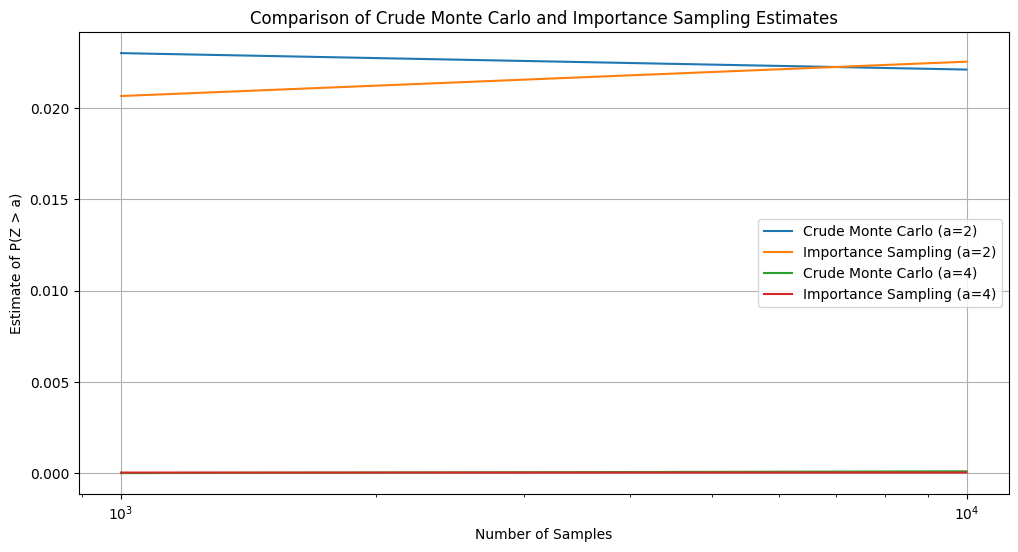

In [10]:
# Crude Monte Carlo Estimator
def crude_monte_carlo(a, n_samples):
    samples = np.random.normal(0, 1, n_samples)
    estimate = np.mean(samples > a)
    return estimate

# Importance Sampling Estimator
def importance_sampling(a, sigma2, n_samples):
    mean = a
    stddev = np.sqrt(sigma2)
    samples = np.random.normal(mean, stddev, n_samples)
    weights = stats.norm.pdf(samples, 0, 1) / stats.norm.pdf(samples, mean, stddev)
    estimate = np.mean(weights * (samples > a))
    return estimate

# Parameters
a_values = [2, 4]
n_samples_list = [1000, 10000]
sigma2_values = [1]

# Results storage
results = []

for a in a_values:
    for n_samples in n_samples_list:
        crude_estimate = crude_monte_carlo(a, n_samples)
        for sigma2 in sigma2_values:
            imp_sampling_estimate = importance_sampling(a, sigma2, n_samples)
            results.append((a, n_samples, sigma2, crude_estimate, imp_sampling_estimate))

# Display results
for result in results:
    a, n_samples, sigma2, crude_estimate, imp_sampling_estimate = result
    print(f"a={a}, n_samples={n_samples}, sigma2={sigma2}")
    print(f"  Crude Monte Carlo estimate: {crude_estimate}")
    print(f"  Importance Sampling estimate: {imp_sampling_estimate}")
    print()

# Plotting for visual comparison (optional)
plt.figure(figsize=(12, 6))
for a in a_values:
    crude_estimates = [crude_monte_carlo(a, n) for n in n_samples_list]
    imp_sampling_estimates = [importance_sampling(a, sigma2_values[0], n) for n in n_samples_list]
    plt.plot(n_samples_list, crude_estimates, label=f'Crude Monte Carlo (a={a})')
    plt.plot(n_samples_list, imp_sampling_estimates, label=f'Importance Sampling (a={a})')

plt.xlabel('Number of Samples')
plt.ylabel('Estimate of P(Z > a)')
plt.title('Comparison of Crude Monte Carlo and Importance Sampling Estimates')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()


5.8

Optimal lambda (analytical): 0.7281439583019315
Variance at optimal lambda (analytical): 3.008512213431132
Optimal lambda (numerical): 0.9
Variance at optimal lambda (numerical): 2.603989026119633


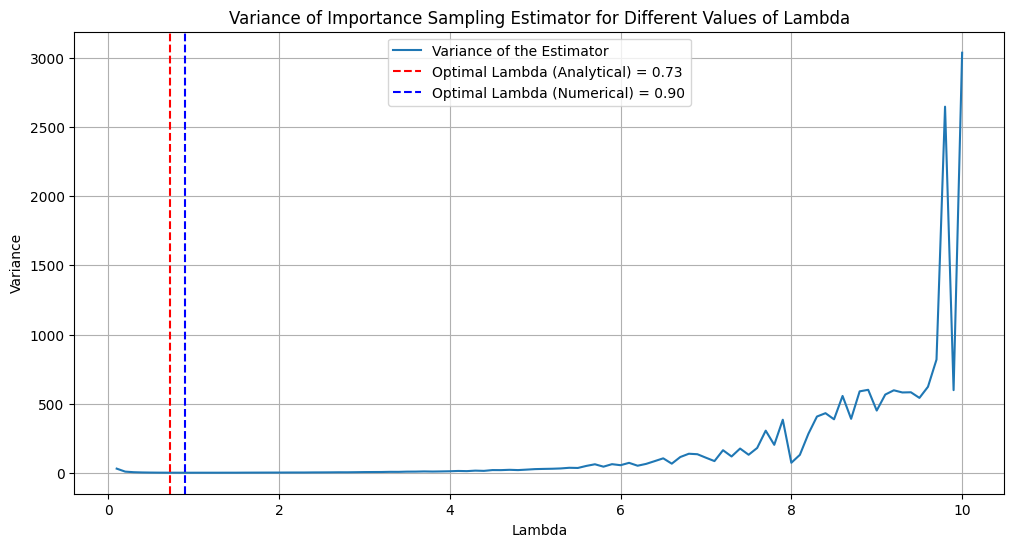

Estimate of the integral using optimal lambda (analytical): 3.33608840706718
Variance of the estimator using optimal lambda (analytical): 2.9416969203318164


In [11]:

from scipy.optimize import minimize_scalar

# Define the integrand function
def integrand(x):
    return np.exp(x)

# Define the importance sampling density function
def importance_density(x, lambda_):
    return lambda_ * np.exp(-lambda_ * x)

# Importance sampling estimator with exponential distribution
def importance_sampling_exponential(lambda_, n_samples):
    # Generate samples from the exponential distribution truncated to [0, 1]
    samples = np.random.exponential(1/lambda_, n_samples)
    samples = samples[samples <= 1]
    
    # Calculate weights
    weights = integrand(samples) / importance_density(samples, lambda_)
    
    # Estimate the integral
    estimate = np.mean(weights)
    variance = np.var(weights)
    
    return estimate, variance

# Analytical variance function for a given lambda
def variance_function(lambda_):
    term1 = (np.exp(2 * lambda_ + 1) - 1) / (lambda_ * (2 * lambda_ + 1))
    term2 = (np.exp(1) - 1) ** 2
    return term1 - term2

# Find the optimal lambda analytically
result = minimize_scalar(variance_function, bounds=(0.1, 10), method='bounded')
optimal_lambda = result.x
optimal_variance = result.fun

print(f"Optimal lambda (analytical): {optimal_lambda}")
print(f"Variance at optimal lambda (analytical): {optimal_variance}")

# Parameters
lambda_values = np.linspace(0.1, 10, 100)
n_samples = 10000

# Results storage
estimates = []
variances = []

for lambda_ in lambda_values:
    estimate, variance = importance_sampling_exponential(lambda_, n_samples)
    estimates.append(estimate)
    variances.append(variance)

# Find the optimal lambda numerically
optimal_lambda_index = np.argmin(variances)
optimal_lambda_numeric = lambda_values[optimal_lambda_index]

# Print the optimal lambda and corresponding variance
print(f"Optimal lambda (numerical): {optimal_lambda_numeric}")
print(f"Variance at optimal lambda (numerical): {variances[optimal_lambda_index]}")

# Plot the variances for different values of lambda
plt.figure(figsize=(12, 6))
plt.plot(lambda_values, variances, label='Variance of the Estimator')
plt.axvline(optimal_lambda, color='red', linestyle='--', label=f'Optimal Lambda (Analytical) = {optimal_lambda:.2f}')
plt.axvline(optimal_lambda_numeric, color='blue', linestyle='--', label=f'Optimal Lambda (Numerical) = {optimal_lambda_numeric:.2f}')
plt.xlabel('Lambda')
plt.ylabel('Variance')
plt.title('Variance of Importance Sampling Estimator for Different Values of Lambda')
plt.legend()
plt.grid(True)
plt.show()

# Verification by simulation using optimal lambda
estimate, variance = importance_sampling_exponential(optimal_lambda, n_samples)
print(f"Estimate of the integral using optimal lambda (analytical): {estimate}")
print(f"Variance of the estimator using optimal lambda (analytical): {variance}")


5.9

When using importance sampling with the Pareto distribution to estimate the mean, choosing the first moment distribution as the sampling distribution is not always meaningful. This approach leverages the fact that the Pareto distribution's first moment (mean) is known, but estimating it using importance sampling would be redundant because we already know the mean. Additionally, this method does not necessarily guarantee a reduction in variance compared to the crude Monte Carlo method. Generally, the choice of an importance sampling distribution \(g(x)\) should facilitate easy sampling and should closely match the shape of the integrand \(f(x)\) in the region of interest. This matching helps reduce the variance of the estimator. The first moment distribution may not be the best choice for different types of distributions and integrals. The reason is that the first moment distribution might not accurately capture the shape and characteristics of the integrand in the most critical regions, leading to suboptimal variance reduction. To reduce variance using importance sampling when estimating \(\int_0^1 e^x dx\), we should choose an importance sampling distribution that better aligns with the behavior of \(e^x\) in the interval \([0, 1]\). One potential choice is a truncated normal distribution centered around the mean of the integrand. However, a more flexible and often better option is the Beta distribution, as it can be parameterized to closely match the shape of \(e^x\). For instance, a Beta distribution with parameters \(\alpha\) and \(\beta\) can be adjusted so that its shape approximates the exponential function \(e^x\) over the interval \([0, 1]\). This choice allows the importance sampling estimator to place more emphasis on regions where \(e^x\) is significant, thereby reducing the variance of the estimator. By understanding and leveraging the characteristics of the integrand and the chosen sampling distribution, importance sampling can be made more efficient, providing more precise and reliable estimates. The key is to select a sampling distribution \(g(x)\) that not only facilitates easy sampling but also mirrors the shape and properties of the integrand \(f(x)\) in the region of interest. This approach ensures that the variance of the importance sampling estimator is minimized, leading to more accurate results with fewer samples. 